# <font color='lightblue'>Hackaton</font>


Usaremos el dataset  [Fruit classification(10 Class)]( https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class/code)
Para clasificar entre 10 tipos de Frutas


In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json


api_token = {"username":"delfinaquinteros2","key":"6f939b69a495e20932a5f3468331edd3"}


import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d karimabdulnabi/fruit-classification10-class

 89% 26.0M/29.2M [00:01<00:00, 34.3MB/s]
100% 29.2M/29.2M [00:01<00:00, 22.9MB/s]


In [3]:
!nvidia-smi

Fri Nov  4 21:35:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
## Extraemos del archivo zip las carpetas
import zipfile
zip_ref = zipfile.ZipFile("fruit-classification10-class.zip")
zip_ref.extractall()
zip_ref.close()

Nota: La estructura de carpetas bajo el nombre de train o test y luego bajo el nombre de pizza o steak en cada caso, es el tipo de estructura que necesita `TensorFlow` para saber cual es la carpeta de entrenamiento y testeo, y cual es la clase (etiqueta) de cada grupo de imagen. Con esta clase que encuentra en el nombre de la carpeta es la que va a utilizar para entrenarse.

In [5]:
import os
os.listdir('MY_data/test/mango')

['img_51.jpeg',
 'img_581.jpeg',
 'img_201.jpeg',
 'img_231.jpeg',
 'img_1261.jpeg',
 'img_871.jpeg',
 'img_531.jpeg',
 'img_821.jpeg',
 'img_1371.jpeg',
 'img_721.jpeg',
 'img_121.jpeg',
 'img_1391.jpeg',
 'img_851.jpeg',
 'img_551.jpeg',
 'img_71.jpeg',
 'img_41.jpeg',
 'img_701.jpeg',
 'img_511.jpeg',
 'img_1061.jpeg',
 'img_1271.jpeg',
 'img_491.jpeg',
 'img_11.jpeg',
 'img_61.jpeg',
 'img_1381.jpeg',
 'img_1281.jpeg',
 'img_611.jpeg',
 'img_1181.jpeg',
 'img_521.jpeg',
 'img_691.jpeg',
 'img_1161.jpeg',
 'img_921.jpeg',
 'img_1451.jpeg',
 'img_31.jpeg',
 'img_801.jpeg',
 'img_981.jpeg',
 'img_1081.jpeg',
 'img_561.jpeg',
 'img_261.jpeg',
 'img_1201.jpeg',
 'img_321.jpeg',
 'img_1041.jpeg',
 'img_1051.jpeg',
 'img_1151.jpeg',
 'img_651.jpeg',
 'img_811.jpeg',
 'img_961.jpeg',
 'img_211.jpeg',
 'img_881.jpeg',
 'img_831.jpeg',
 'img_791.jpeg',
 'img_1441.jpeg',
 'img_1401.jpeg',
 'img_501.jpeg',
 'img_431.jpeg',
 'img_221.jpeg',
 'img_681.jpeg',
 'img_1171.jpeg',
 'img_971.jpeg',
 '

In [6]:
# Exploramos las carpetas un poco...
import os

for dir, dirname, files in os.walk('MY_data'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: MY_data | subdir: ['predict', 'test', 'train'] | cant de imagenes: 0 
Dir: MY_data/predict | subdir: [] | cant de imagenes: 48 
Dir: MY_data/test | subdir: ['watermelon', 'cherry', 'orange', 'avocado', 'apple', 'mango', 'stawberries', 'banana', 'kiwi', 'pinenapple'] | cant de imagenes: 0 
Dir: MY_data/test/watermelon | subdir: [] | cant de imagenes: 105 
Dir: MY_data/test/cherry | subdir: [] | cant de imagenes: 105 
Dir: MY_data/test/orange | subdir: [] | cant de imagenes: 97 
Dir: MY_data/test/avocado | subdir: [] | cant de imagenes: 105 
Dir: MY_data/test/apple | subdir: [] | cant de imagenes: 89 
Dir: MY_data/test/mango | subdir: [] | cant de imagenes: 105 
Dir: MY_data/test/stawberries | subdir: [] | cant de imagenes: 103 
Dir: MY_data/test/banana | subdir: [] | cant de imagenes: 106 
Dir: MY_data/test/kiwi | subdir: [] | cant de imagenes: 105 
Dir: MY_data/test/pinenapple | subdir: [] | cant de imagenes: 105 
Dir: MY_data/train | subdir: ['watermelon', 'cherry', 'orange', 'Ba

Vemos que la carpeta train contiene 2301 imágenes. 230 de cada fruta, excepto mango con 231

La carpeta test contiene 1073 imágenes entre las que hay de 'banana', 'stawberries', 'pinenapple', 'mango', 'watermelon', 'avocado', 'orange', 'cherry', 'apple', 'kiwi

In [7]:
#Guardamos el nombre de las carpetas que haya dentro de train en una lista
# se puede hacer a mano pero a veces son muchas y podemos cometer errores.

classes = [f for f in os.listdir('MY_data/train/')]
print(classes)

['watermelon', 'cherry', 'orange', 'Banana', 'avocado', 'strawberries', 'mango', 'kiwi', 'Apple', 'pinenapple']


### Visualizamos algunos ejemplos del dataset

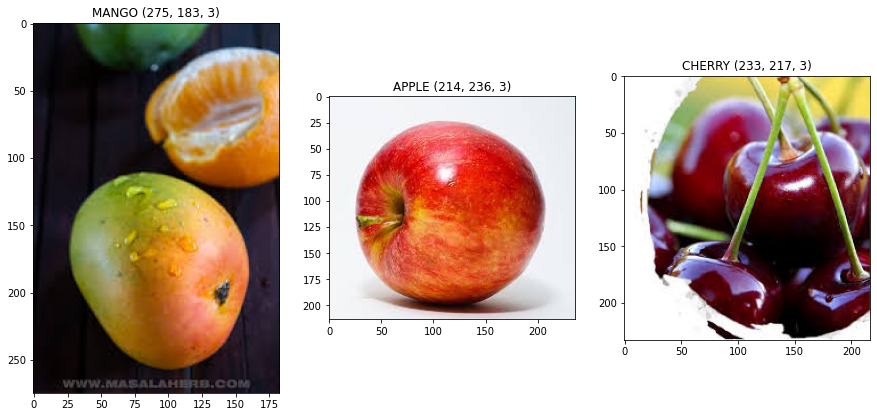

In [8]:
import matplotlib.pyplot as plt
import random 

plt.figure(figsize=(15,7))
id = random.choice(range(0,229))
plt.subplot(1,3,1)
img_name = [f for f in os.listdir('MY_data/train/mango/')][id]
img = plt.imread('MY_data/train/mango/'+img_name)
plt.imshow(img)
plt.title('MANGO '+str(img.shape))
plt.subplot(1,3,2)
img_name = [f for f in os.listdir('MY_data/train/Apple/')][id]
img = plt.imread('MY_data/train/Apple/'+img_name)
plt.imshow(img)
plt.title('APPLE '+str(img.shape))
plt.subplot(1,3,3)
img_name = [f for f in os.listdir('MY_data/train/cherry/')][id]
img = plt.imread('MY_data/train/cherry/'+img_name)
plt.imshow(img)
plt.title('CHERRY '+str(img.shape));

In [9]:
#Exploramos los características de las imágenes
lista_img_maguito = [f for f in os.listdir('MY_data/train/mango/')]
imagen_prueba = plt.imread('MY_data/train/mango/'+lista_img_maguito[21]) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {imagen_prueba.shape}")
print(f"Dimensiones de la imagen: {imagen_prueba.ndim}")
print(f"Codificación la imagen: {imagen_prueba.dtype}")
print(f"Pixel de mayor valor: {imagen_prueba.max()}")
print(f"Pixel de menor valor: {imagen_prueba.min()}")

Shape de la imagen: (183, 275, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


test cmap

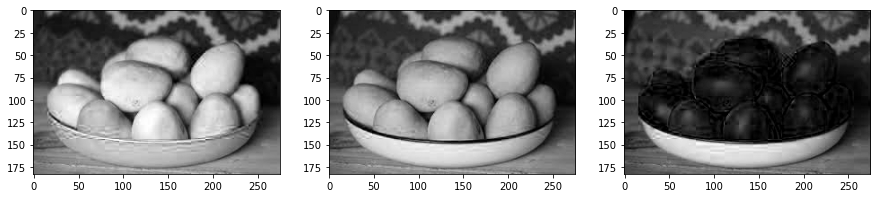

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(imagen_prueba[:,:,0],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imagen_prueba[:,:,1],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imagen_prueba[:,:,2],cmap='gray');

### Creamos la arquitectura de una red neuronal convolucional
Vamos a construir una red neuronal convolucional para encontrar patrones en nuestras imágenes, más específicamente, necesitamos una forma de:
* Cargar la imágenes con TensorFlow
* Preprocesar las imágenes para escalarlas.
* Construir la red convolucional para clasificación
* Compilar la CNN
* Entrenar la CNN con los datos de entrenamiento. 

In [11]:
import tensorflow as tf
print(f"Version: {tf.__version__}")

Version: 2.9.2


In [12]:
# Primero instanciamos el generador de dataset
# Este lo que hace es permitirnos preprocesar las imagenes (rescalarlas y aplicarles tecnicas de data augmentation)
tf.random.set_seed(42) #usamos este seed para que cada vez que ejecutemos la celda nos repetira los mismos valores, se usa mucho cuando queremos replicar experimentos

train_dir = '/content/MY_data/train'
test_dir = '/content/MY_data/test'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical') #multiclass -> 'categorical' [001,100,010]
test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [13]:
imagenes, etiquetas = train_batch[0]
print(len(imagenes),len(etiquetas))



32 32


In [14]:
classes

['watermelon',
 'cherry',
 'orange',
 'Banana',
 'avocado',
 'strawberries',
 'mango',
 'kiwi',
 'Apple',
 'pinenapple']

In [15]:
etiquetas

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [94]:
import tensorflow as tf
#Creamos la red convolucional 

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([220,220,3])), 
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'), #Conv -> Maxpooling -> Conv -> Maxpooling -> Flatten(vectorización) -> DNN 
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),    
    tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Flatten(), #vectorización    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout((0.20)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 216, 216, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 108, 108, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 104, 104, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)      

In [95]:
## Compilamos el modelo
model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [96]:
## Entrenamos el modelo
model_0.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_0',save_best_only=True),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5),
                         tf.keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/200
72/72 [==============================] - ETA: 0s - loss: 2.0705 - accuracy: 0.1947 - precision_2: 0.4776 - recall_2: 0.0139

72/72 [==============================] - 29s 145ms/step - loss: 2.0705 - accuracy: 0.1947 - precision_2: 0.4776 - recall_2: 0.0139 - val_loss: 1.8355 - val_accuracy: 0.2761 - val_precision_2: 0.3377 - val_recall_2: 0.0507 - lr: 1.0000e-04
Epoch 2/200
72/72 [==============================] - ETA: 0s - loss: 1.6107 - accuracy: 0.3803 - precision_2: 0.5714 - recall_2: 0.1217

72/72 [==============================] - 10s 138ms/step - loss: 1.6107 - accuracy: 0.3803 - precision_2: 0.5714 - recall_2: 0.1217 - val_loss: 1.6835 - val_accuracy: 0.4098 - val_precision_2: 0.6123 - val_recall_2: 0.1649 - lr: 1.0000e-04
Epoch 3/200
72/72 [==============================] - 8s 108ms/step - loss: 1.4451 - accuracy: 0.4537 - precision_2: 0.6206 - recall_2: 0.2090 - val_loss: 1.7058 - val_accuracy: 0.3883 - val_precision_2: 0.5744 - val_recall_2: 0.1883 - lr: 1.0000e-04
Epoch 4/200
72/72 [==============================] - ETA: 0s - loss: 1.3775 - accuracy: 0.4772 - precision_2: 0.6429 - recall_2: 0.2581

72/72 [==============================] - 10s 139ms/step - loss: 1.3775 - accuracy: 0.4772 - precision_2: 0.6429 - recall_2: 0.2581 - val_loss: 1.6287 - val_accuracy: 0.4195 - val_precision_2: 0.6165 - val_recall_2: 0.2556 - lr: 1.0000e-04
Epoch 5/200
72/72 [==============================] - 8s 113ms/step - loss: 1.2838 - accuracy: 0.5332 - precision_2: 0.6867 - recall_2: 0.3133 - val_loss: 1.6758 - val_accuracy: 0.3883 - val_precision_2: 0.4839 - val_recall_2: 0.2644 - lr: 1.0000e-04
Epoch 6/200
72/72 [==============================] - ETA: 0s - loss: 1.2301 - accuracy: 0.5515 - precision_2: 0.6992 - recall_2: 0.3516

72/72 [==============================] - 10s 143ms/step - loss: 1.2301 - accuracy: 0.5515 - precision_2: 0.6992 - recall_2: 0.3516 - val_loss: 1.6118 - val_accuracy: 0.4498 - val_precision_2: 0.6011 - val_recall_2: 0.3190 - lr: 1.0000e-04
Epoch 7/200
72/72 [==============================] - 8s 110ms/step - loss: 1.1373 - accuracy: 0.5989 - precision_2: 0.7421 - recall_2: 0.4176 - val_loss: 1.7365 - val_accuracy: 0.4000 - val_precision_2: 0.4787 - val_recall_2: 0.2966 - lr: 1.0000e-04
Epoch 8/200
72/72 [==============================] - ETA: 0s - loss: 1.1039 - accuracy: 0.6041 - precision_2: 0.7339 - recall_2: 0.4302

72/72 [==============================] - 10s 141ms/step - loss: 1.1039 - accuracy: 0.6041 - precision_2: 0.7339 - recall_2: 0.4302 - val_loss: 1.5266 - val_accuracy: 0.4780 - val_precision_2: 0.6065 - val_recall_2: 0.3834 - lr: 1.0000e-04
Epoch 9/200
72/72 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.6293 - precision_2: 0.7507 - recall_2: 0.4867

72/72 [==============================] - 10s 140ms/step - loss: 1.0295 - accuracy: 0.6293 - precision_2: 0.7507 - recall_2: 0.4867 - val_loss: 1.5025 - val_accuracy: 0.4732 - val_precision_2: 0.6180 - val_recall_2: 0.3756 - lr: 1.0000e-04
Epoch 10/200
72/72 [==============================] - 9s 118ms/step - loss: 0.9929 - accuracy: 0.6436 - precision_2: 0.7614 - recall_2: 0.5020 - val_loss: 1.5328 - val_accuracy: 0.4985 - val_precision_2: 0.6086 - val_recall_2: 0.4293 - lr: 1.0000e-04
Epoch 11/200
72/72 [==============================] - 8s 110ms/step - loss: 1.0067 - accuracy: 0.6362 - precision_2: 0.7536 - recall_2: 0.5024 - val_loss: 1.5427 - val_accuracy: 0.5141 - val_precision_2: 0.6750 - val_recall_2: 0.4215 - lr: 1.0000e-04
Epoch 12/200
72/72 [==============================] - 8s 110ms/step - loss: 0.9683 - accuracy: 0.6714 - precision_2: 0.7774 - recall_2: 0.5267 - val_loss: 1.6112 - val_accuracy: 0.5044 - val_precision_2: 0.6047 - val_recall_2: 0.4312 - lr: 1.0000e-04
Epoch 13

*Comparativa entre Training y Test Acuraccy y Loss*

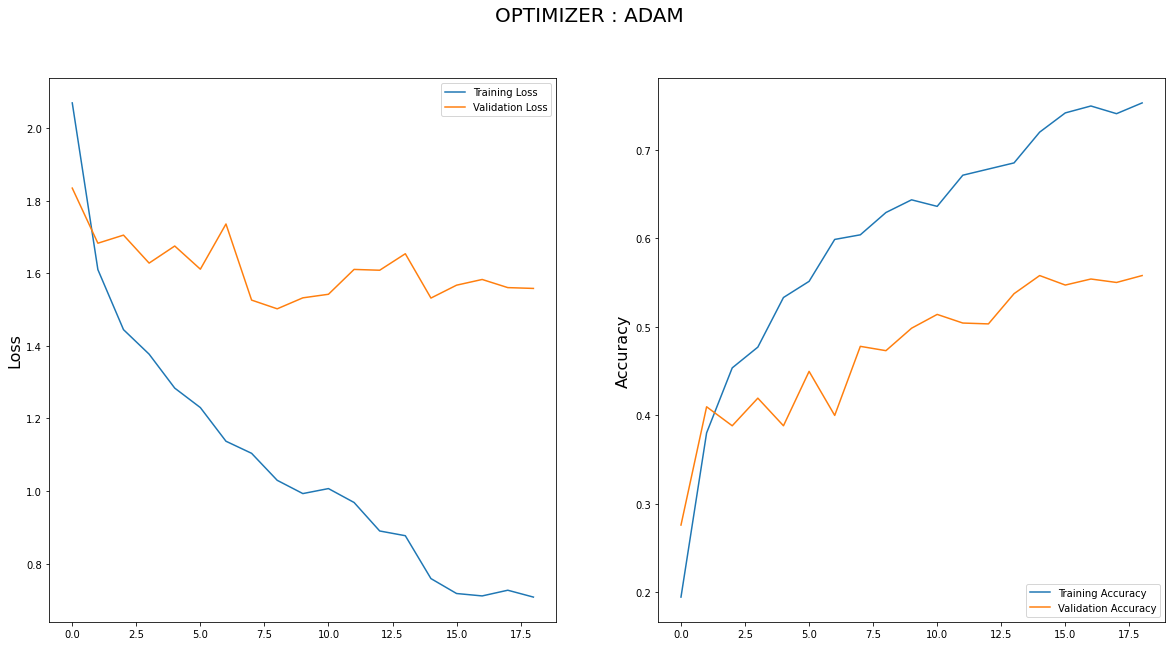

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('OPTIMIZER : ADAM', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_0.history.history['loss'], label='Training Loss')
plt.plot(model_0.history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_0.history.history['accuracy'], label='Training Accuracy')
plt.plot(model_0.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


*   La pérdida en el caso del entrenamiento bajó a medida que incrementaban las iteraciones, mientras que la de validación se fue estancando.

*  Por más que la precisión haya aumentado, la de testeo aumentó más que validación.

Evaluar modelo

In [61]:
model_0 = tf.keras.models.load_model('/content/checkpoints/model_0')

In [62]:
model_0.evaluate(test_batch)

33/33 [==============================] - 3s 67ms/step - loss: 1.5238 - accuracy: 0.5298 - precision_1: 0.6471 - recall_1: 0.4507


[1.5237822532653809,
 0.5297560691833496,
 0.6470588445663452,
 0.45073169469833374]

### Hacemos una predicción

In [79]:
# Elegimos una imagen de dataset a gusto
img = plt.imread('/content/MY_data/test/banana/img_161.jpeg')

#Rescalamos la imagen para introducirla al modelo
img = img/255.

#Ajustamos la imagen a 220,220,3

img.resize((220,220,3))
img_expanded = tf.expand_dims(img, axis=0)

y_pred = model_0.predict(img_expanded)
print(y_pred) #Softmax

1/1 [==============================] - 0s 20ms/step
[[0.00081063 0.16808258 0.14396924 0.01587036 0.01082621 0.02187439
  0.09256338 0.09461413 0.0055933  0.44579574]]


In [66]:
y_pred = tf.squeeze(y_pred)
tf.math.reduce_sum(y_pred).numpy()

1.0

In [67]:
tf.argmax(y_pred).numpy()

9

In [68]:
y_pred = tf.squeeze(y_pred)
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de banana es: {y_pred} ") #ARGMAX

La predicción para la imagen de banana es: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


In [69]:
y_pred = tf.argmax(y_pred) #argmax retorna el indice del item mayor de todos los items
print(f"La clase es: {classes[y_pred]}")

La clase es: watermelon


##Show Images about testing

In [80]:
import numpy as np
import glob as gb
import cv2 as cv

In [81]:
s=220

In [82]:
x_pred = []
files = gb.glob(pathname=str("/content/MY_data/predict/" +"/*.jpeg"))
for file in files:
    image = cv.imread(file)
    image_array = cv.resize(image , (s , s))
    x_pred.append(list(image_array))

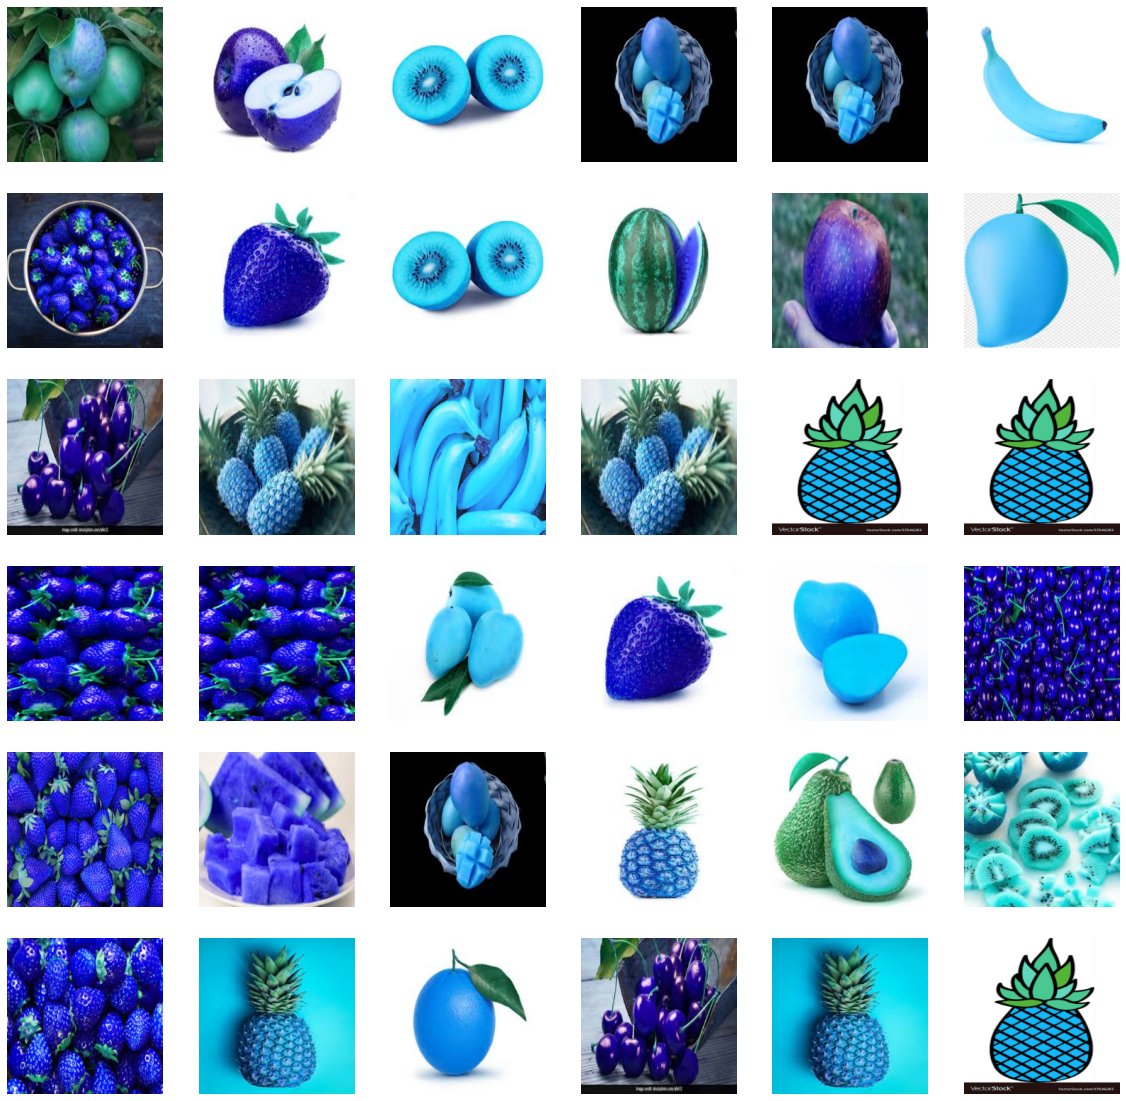

In [83]:
plt.figure(figsize=(20 , 20))
for o , p in enumerate(list(np.random.randint(0 , 48 ,36))):
    plt.subplot(6 , 6 , o+1)
    plt.imshow(x_pred[p])
    plt.axis("off")

GRAFICO ENTRENAMIENTO


In [84]:
code_train = {"Apple" : 0, "avocado" :1 , "Banana" :2 , "cherry" :3 , "kiwi" :4 , "mango" :5 , "orange" :6 , "pinenapple" :7 ,
        "strawberries" :8 , "watermelon" :9 }

def getcode_train(n):
    for x , y in code_train.items():
        if n==y:
            return x

In [85]:
x_pred_array = np.array(x_pred)


In [87]:
y_result = model_0.predict(x_pred_array)
y_result.shape

2/2 [==============================] - 0s 17ms/step


(48, 10)

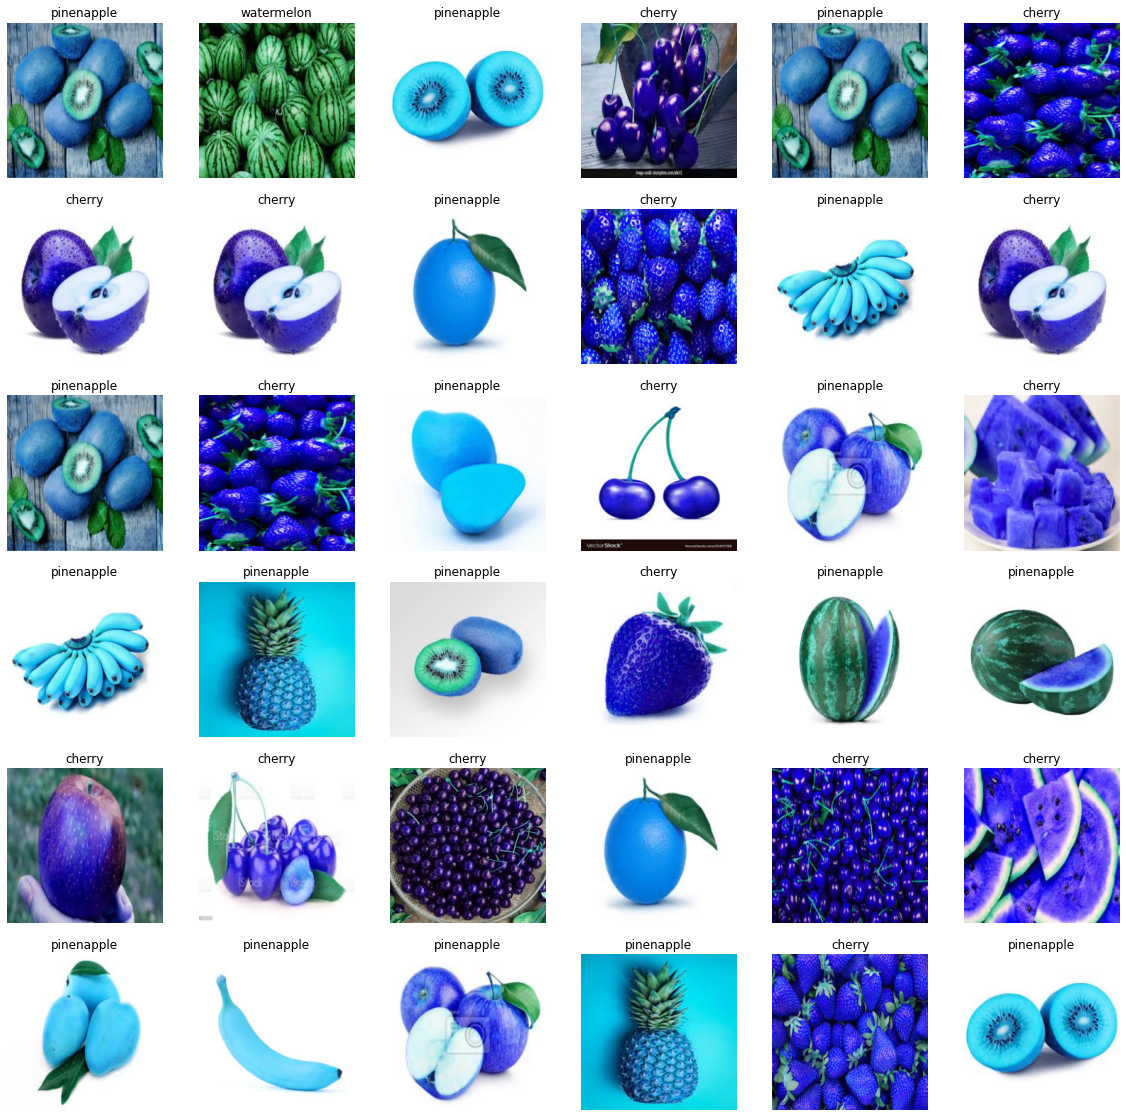

In [88]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , 48 , 36))):
    plt.subplot(6 , 6 , n+1)
    plt.imshow(x_pred[i])
    plt.axis("off")
    plt.title(getcode_train(np.argmax(y_result[i])))

---

##Conclucion 


*   Se pudo observar que aunque mejorando los parametros para mejorar las métricas del modelo no superamos el 90% de accuracy debido a que los datos brindados de testeo y entrenamiento no están equilibrados. 

*   En el último gráfico podemos observar los errores de la IA en el entrenamiento.